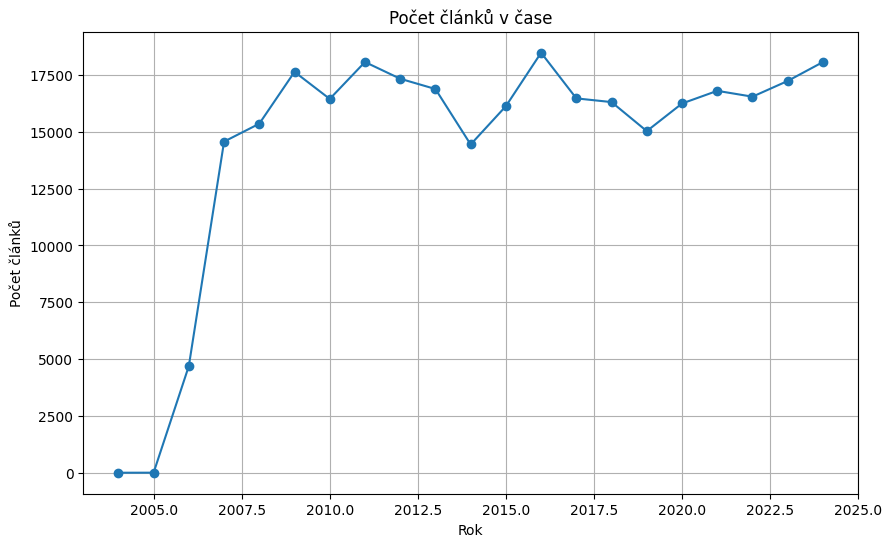

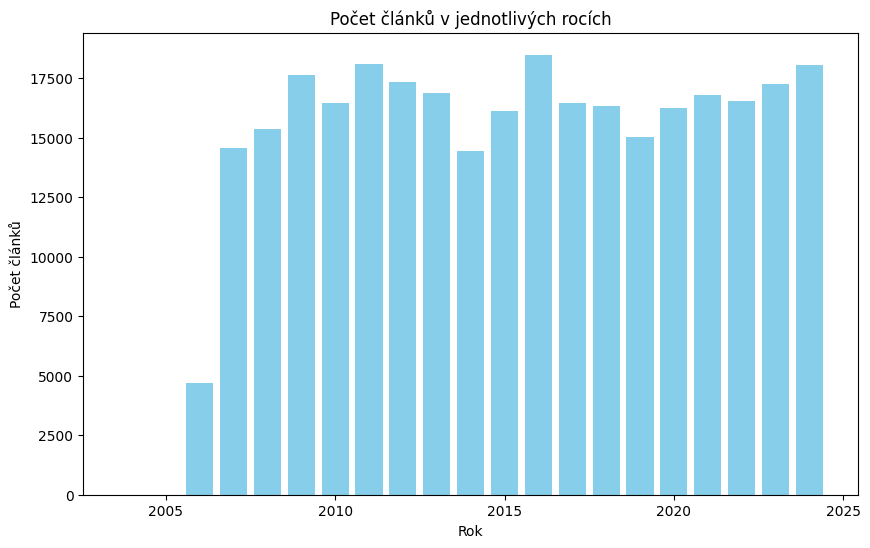

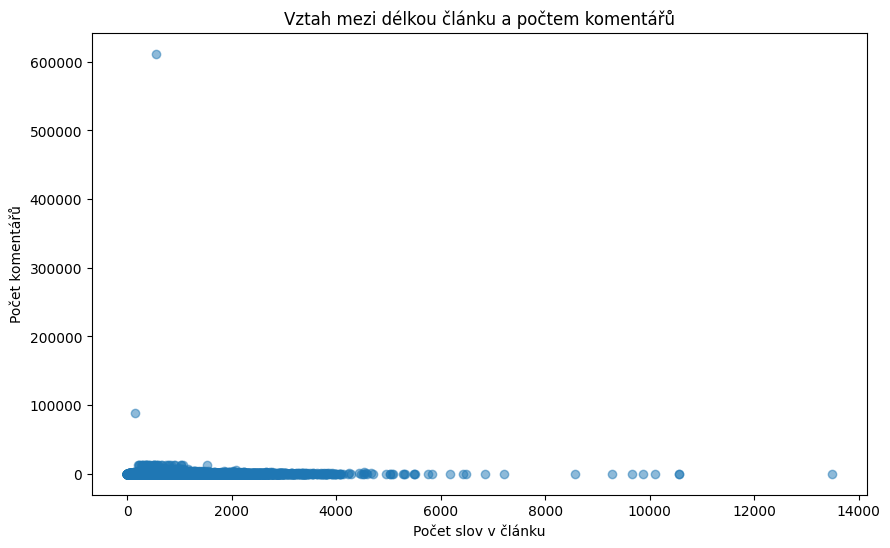

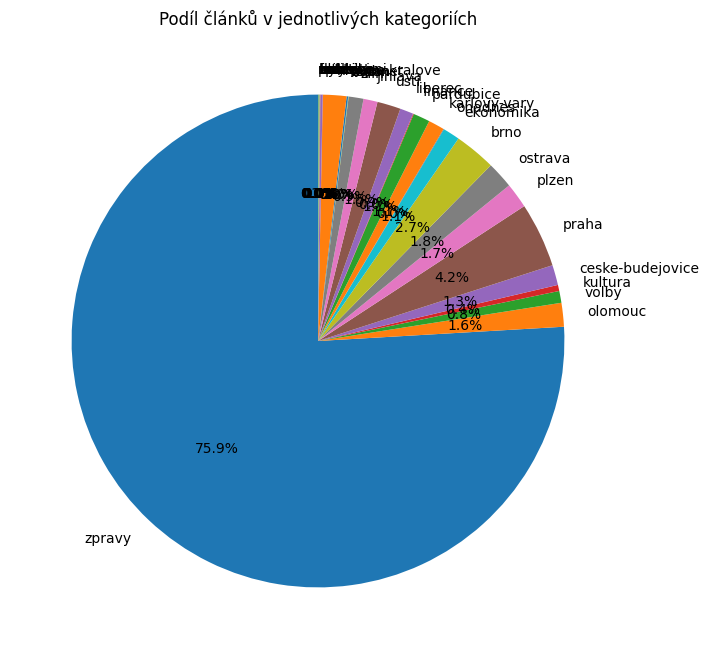

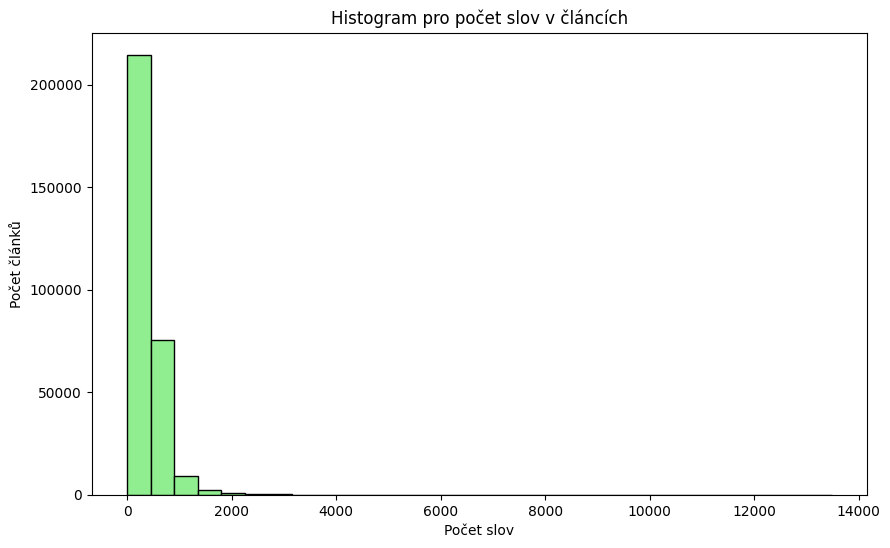

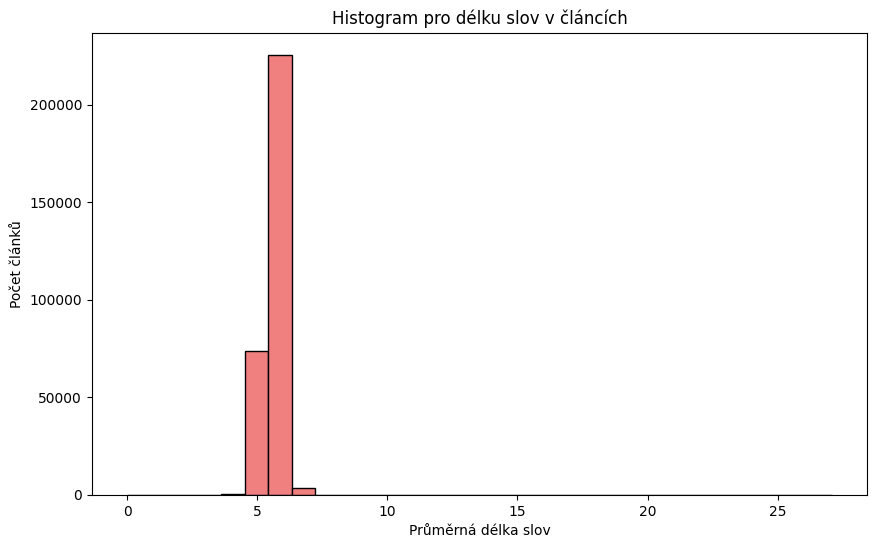

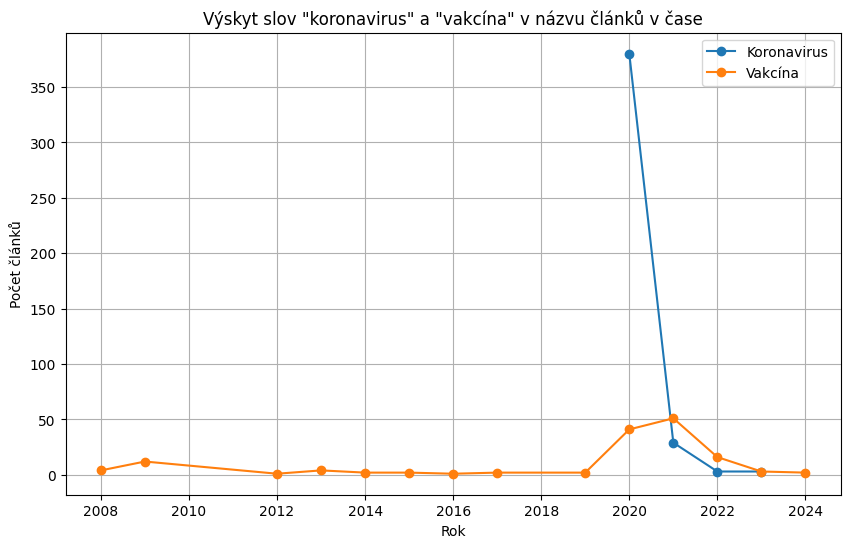

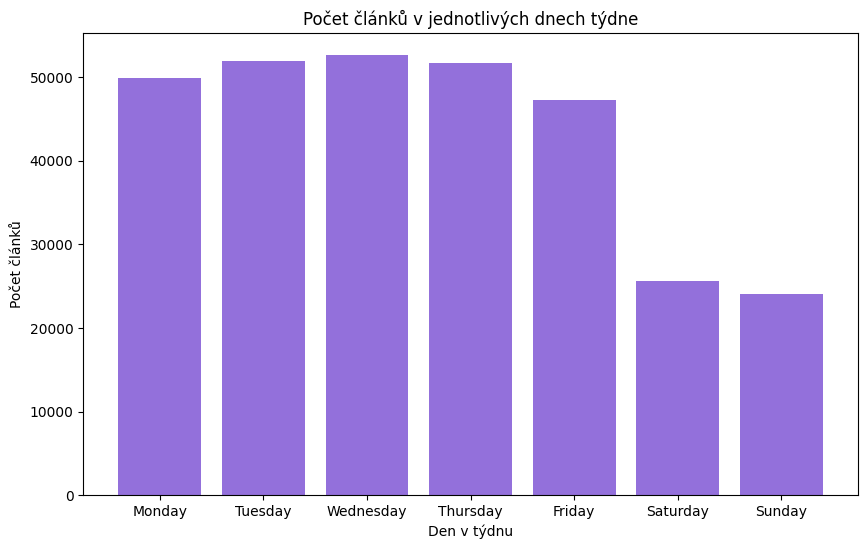

In [2]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Povolení inline grafů pro Jupyter Notebook
%matplotlib inline

# Načtení JSON dat
def load_data(file_path):
    """Načte JSON data z dané cesty."""
    with open(file_path, encoding='utf-8') as f:
        data = json.load(f)
    return data

# Pomocné funkce
def extract_year(date_str):
    """Vytáhne rok z formátu ISO data."""
    if isinstance(date_str, str):
        return datetime.fromisoformat(date_str).year
    return None  # Pokud není platný řetězec, vrátí None

def extract_weekday(date_str):
    """Vytáhne den v týdnu z formátu ISO data."""
    if isinstance(date_str, str):
        return datetime.fromisoformat(date_str).strftime('%A')
    return None  # Pokud není platný řetězec, vrátí None

def word_count(content):
    """Spočítá počet slov v obsahu článku."""
    return sum(len(paragraph.split()) for paragraph in content)

def avg_word_length(content):
    """Vypočítá průměrnou délku slova v obsahu článku."""
    words = ' '.join(content).split()
    return sum(len(word) for word in words) / len(words) if words else 0

# Vykreslování grafů
def plot_articles_over_time(data):
    """
    Vykreslení křivky zobrazující přidávání článků v čase
    
    Args:
        data (list): Načtená JSON data článků
    """
    years = [extract_year(article['time']) for article in data if extract_year(article['time']) is not None]
    year_counts = Counter(years)

    plt.figure(figsize=(10,6))
    plt.plot(sorted(year_counts.keys()), [year_counts[year] for year in sorted(year_counts.keys())], marker='o')
    plt.title('Počet článků v čase')
    plt.xlabel('Rok')
    plt.ylabel('Počet článků')
    plt.grid(True)
    plt.show()

def plot_articles_by_year(data):
    """
    Vykreslený sloupcový graf zobrazující počet článků v jednotlivých rocích

    Args:
        data (list): Načtená JSON data článků
    """
    years = [extract_year(article['time']) for article in data if extract_year(article['time']) is not None]
    year_counts = Counter(years)

    plt.figure(figsize=(10,6))
    plt.bar(sorted(year_counts.keys()), [year_counts[year] for year in sorted(year_counts.keys())], color='skyblue')
    plt.title('Počet článků v jednotlivých rocích')
    plt.xlabel('Rok')
    plt.ylabel('Počet článků')
    plt.show()

def plot_length_vs_comments(data):
    """
    Vykreslení scatter grafu zobrazující vztah mezi délkou článku a počtem komentářů

    Args:
        data (list): Načtená JSON data článků
    """
    article_lengths = [word_count(article['content']) for article in data]
    comment_counts = [article['comment_count'] for article in data]

    plt.figure(figsize=(10,6))
    plt.scatter(article_lengths, comment_counts, alpha=0.5)
    plt.title('Vztah mezi délkou článku a počtem komentářů')
    plt.xlabel('Počet slov v článku')
    plt.ylabel('Počet komentářů')
    plt.show()

def plot_category_pie_chart(data):
    """
    Vykreslení koláčového grafu zobrazující podíl článků v jednotlivých kategoriích
    
    Args:
        data (list): Načtená JSON data článků
    """
    categories = [article['category'] for article in data]
    category_counts = Counter(categories)

    plt.figure(figsize=(8,8))
    plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Podíl článků v jednotlivých kategoriích')
    plt.show()

def plot_word_count_histogram(data):
    """
    Vykreslední histogramu pro počet slov v článcích
    
    Args:
        data (list): Načtená JSON data článků
    """
    article_lengths = [word_count(article['content']) for article in data]

    plt.figure(figsize=(10,6))
    plt.hist(article_lengths, bins=30, color='lightgreen', edgecolor='black')
    plt.title('Histogram pro počet slov v článcích')
    plt.xlabel('Počet slov')
    plt.ylabel('Počet článků')
    plt.show()

def plot_word_length_histogram(data):
    """
    Vykreslení histogramu pro délku slov v článcích

    Args:
        data (list): Načtená JSON data článků
    """
    word_lengths = [avg_word_length(article['content']) for article in data]

    plt.figure(figsize=(10,6))
    plt.hist(word_lengths, bins=30, color='lightcoral', edgecolor='black')
    plt.title('Histogram pro délku slov v článcích')
    plt.xlabel('Průměrná délka slov')
    plt.ylabel('Počet článků')
    plt.show()

def plot_keyword_timeline(data):
    """
    Vykreslení časové osy zobrazující výskyt slova koronavirus v názvu článků

    Args:
        data (list): Načtená JSON data článků
    """
    corona_articles = [extract_year(article['time']) for article in data if 'koronavirus' in article['title'].lower() and extract_year(article['time']) is not None]
    vaccine_articles = [extract_year(article['time']) for article in data if 'vakcína' in article['title'].lower() and extract_year(article['time']) is not None]

    corona_counts = Counter(corona_articles)
    vaccine_counts = Counter(vaccine_articles)

    plt.figure(figsize=(10,6))
    plt.plot(sorted(corona_counts.keys()), [corona_counts[year] for year in sorted(corona_counts.keys())], label='Koronavirus', marker='o')
    plt.plot(sorted(vaccine_counts.keys()), [vaccine_counts[year] for year in sorted(vaccine_counts.keys())], label='Vakcína', marker='o')
    plt.title('Výskyt slov "koronavirus" a "vakcína" v názvu článků v čase')
    plt.xlabel('Rok')
    plt.ylabel('Počet článků')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_articles_by_weekday(data):
    """
    Vykreslete histogram pro počet článků v jednotlivých dnech týdne

    Args:
        data (list): Načtená JSON data článků
    """
    weekdays = [extract_weekday(article['time']) for article in data if extract_weekday(article['time']) is not None]
    weekday_counts = Counter(weekdays)

    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    plt.figure(figsize=(10,6))
    plt.bar(order, [weekday_counts[day] for day in order], color='mediumpurple')
    plt.title('Počet článků v jednotlivých dnech týdne')
    plt.xlabel('Den v týdnu')
    plt.ylabel('Počet článků')
    plt.show()

# Hlavní funkce
def main():
    file_path = "./../cv02/data/filtered_data.json"
    data = load_data(file_path)
    
    # Vykreslení grafů
    plot_articles_over_time(data)
    plot_articles_by_year(data)
    plot_length_vs_comments(data)
    plot_category_pie_chart(data)
    plot_word_count_histogram(data)
    plot_word_length_histogram(data)
    plot_keyword_timeline(data)
    plot_articles_by_weekday(data)

if __name__ == "__main__":
    main()
